In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import wordnet
nltk.download(["stopwords", "punkt", "wordnet", "omw-1.4", "vader_lexicon"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jamie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jamie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jamie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jamie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jamie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [3]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
data.shape

(23486, 10)

In [6]:
data.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [7]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
data["Recommended IND"].value_counts()

Recommended IND
1    19314
0     4172
Name: count, dtype: int64

In [9]:
data["Rating"].value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

In [10]:
# check for number of recommendations when rating is 4 or 5
data_over_4_rating = data[data["Rating"]>=4]
data_over_4_rating["Recommended IND"].value_counts()

Recommended IND
1    18015
0      193
Name: count, dtype: int64

## Exploratory Data Analysis
- Categorical variables - Title, Review Text, Division Name, Department Name, Class Name
- Numerical variables - Clothing ID, Age, Rating, Recommended IND (0/1), Positive Feedback Count
- Number of rows - 23,486
- Initial classes balance of “Recommended IND” - 19,314 yes, 4,172 no
- Missing values - Title = 3810, Review text = 845, Division Name/Department Name/Class Name = 14
- "Rating" is more imbalance, 15131 in 5 (56% of all values)
- 193 cases with customer rating 4 or 5 but did not recommend the product. Model may have difficulty with these cases

## Data Preprocessing
- Missing Values
- View graphs to establish any relationships between categorical variables and the target variables "Rating" & "Recommended IND"
- Delete unnecessary columns
- Rename columns for readability
- Encode "Ratings" for binary classification instead of multiclass

### Missing Values
- Title = 3810 
- Review text = 845 
- Division Name, Department Name, Class Name = 14 <br>
<br>
"Title", "Division Name", "Department Name" & "Class Name" columns not required for analysis, will be dropped from the DataFrame. Missing values in these columns do not matter and rows deleted now.
<br>
<br>
"Review Text" is column the text mining & sentiment analysis will be conducted on. There is no method for imputing the missing values. The number of missing values (845) is relatively low compared to the size of the dataset (23486) so rows containing missing values can be deleted without losing much information from the dataset.

In [11]:
# drop rows containing missing values in the "Title", "Division Name", "Department Name" & "Class Name" columns
data.dropna(subset=["Title", "Division Name", "Department Name", "Class Name"], inplace=True)

In [12]:
# drop rows containing missing values in "Review Text" column
data.dropna(subset=["Review Text"], inplace=True)

In [13]:
# all missing values are dealt with
data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

### Graphical Analysis of Variables
Graphs to view any relationships between variables.

C:\Users\jamie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


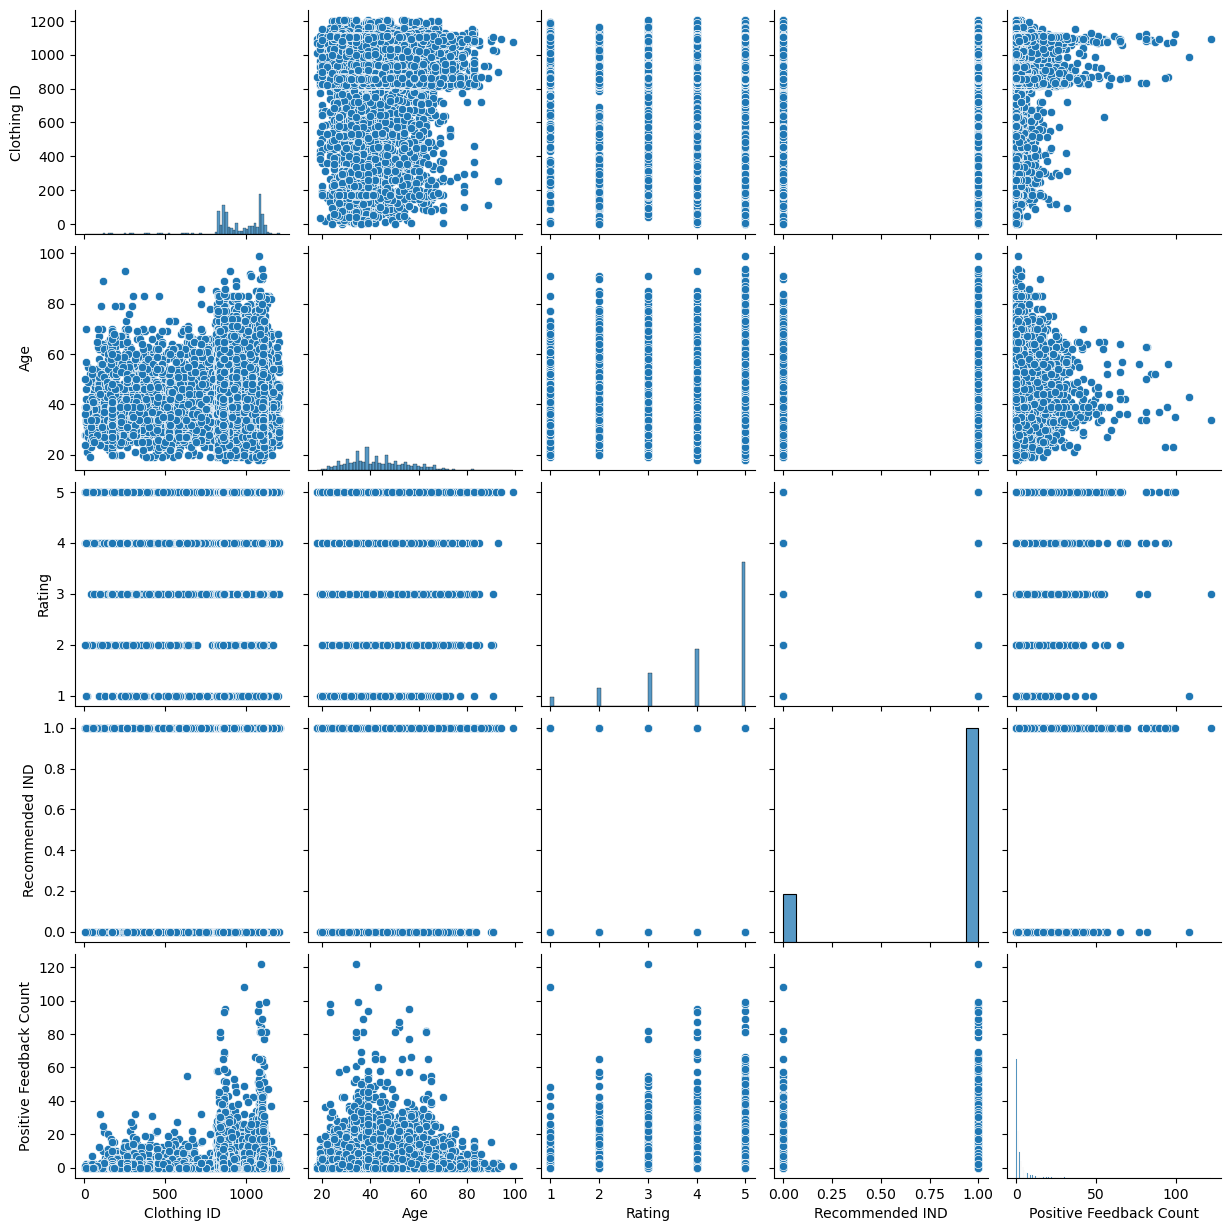

In [14]:
sns.pairplot(data)

### Graphical Conclusions
- Pairplot shows that there are similar "Age" giving every value of "Ratings"
### Delete Unrequired Columns

In [15]:
# delete columns not required for text mining
data.drop(["Clothing ID", "Age", "Title", "Positive Feedback Count", "Division Name", "Department Name", "Class Name", "Recommended IND"], 
          axis=1, inplace=True)

In [16]:
# reset index of dataframe after dropping columns
data.reset_index(drop=True, inplace=True)

In [17]:
data

,Review Text,Rating
0,I had such high hopes for this dress and reall...,3
1,"I love, love, love this jumpsuit. it's fun, fl...",5
2,This shirt is very flattering to all due to th...,5
3,"I love tracy reese dresses, but this one is no...",2
4,I aded this in my basket at hte last mintue to...,5
...,...,...
19657,I was very happy to snag this dress at such a ...,5
19658,"It reminds me of maternity clothes. soft, stre...",3
19659,"This fit well, but the top was very see throug...",3
19660,I bought this dress for a wedding i have this ...,3


There are 19,662 rows in the DataFrame for conducting text mining and sentiment analysis on.

### Rename Columns
Rename columns for readability.

In [18]:
data.rename(columns={"Review Text": "review_text", "Rating":"rating"}, inplace=True)

### Encode Ratings to Binary
To make this a binary classification problem, the "ratings" options will be encoded to binary. 1 will represent ratings of 4 & 5, 0 will represent ratings of 1, 2 or 3. These binary options are 1 for "good" reviews and 0 for "not good/bad" reviews.

In [19]:
# encode ratings of 4 & 5 as 1 and ratings of 1, 2 & 3 as 0.
data["rating"].replace({1:0, 2:0, 3:0, 4:1, 5:1}, inplace=True)

In [20]:
data["rating"].value_counts()

rating
1    15147
0     4515
Name: count, dtype: int64

## Text Mining Preprocessing
Test the text mining preprocessing steps on one review then create function to carry out all tasks on the full dataset.

In [21]:
text = data.loc[0,"review_text"]
text

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [22]:
# create instance of the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer("[a-zA-Z0-9\"]+")

In [23]:
# test tokenizer on the first review
tokenized_text = tokenizer.tokenize(text)
tokenized_text

['I',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'really',
 'wanted',
 'it',
 'to',
 'work',
 'for',
 'me',
 'i',
 'initially',
 'ordered',
 'the',
 'petite',
 'small',
 'my',
 'usual',
 'size',
 'but',
 'i',
 'found',
 'this',
 'to',
 'be',
 'outrageously',
 'small',
 'so',
 'small',
 'in',
 'fact',
 'that',
 'i',
 'could',
 'not',
 'zip',
 'it',
 'up',
 'i',
 'reordered',
 'it',
 'in',
 'petite',
 'medium',
 'which',
 'was',
 'just',
 'ok',
 'overall',
 'the',
 'top',
 'half',
 'was',
 'comfortable',
 'and',
 'fit',
 'nicely',
 'but',
 'the',
 'bottom',
 'half',
 'had',
 'a',
 'very',
 'tight',
 'under',
 'layer',
 'and',
 'several',
 'somewhat',
 'cheap',
 'net',
 'over',
 'layers',
 'imo',
 'a',
 'major',
 'design',
 'flaw',
 'was',
 'the',
 'net',
 'over',
 'layer',
 'sewn',
 'directly',
 'into',
 'the',
 'zipper',
 'it',
 'c']

In [24]:
# create the list of stop words
stop_words = nltk.corpus.stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
# remove stopwords from the first review
cleaned_tokens = []

for word in tokenized_text:
    word = word.lower()
    if word not in stop_words:
        cleaned_tokens.append(word)
cleaned_tokens

['high',
 'hopes',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layers',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c']

In [26]:
# assign each word with a pos value
tagged_words = nltk.pos_tag(cleaned_tokens)

tagged_words

[('high', 'JJ'),
 ('hopes', 'NNS'),
 ('dress', 'VBP'),
 ('really', 'RB'),
 ('wanted', 'JJ'),
 ('work', 'NN'),
 ('initially', 'RB'),
 ('ordered', 'VBD'),
 ('petite', 'JJ'),
 ('small', 'JJ'),
 ('usual', 'JJ'),
 ('size', 'NN'),
 ('found', 'VBD'),
 ('outrageously', 'RB'),
 ('small', 'JJ'),
 ('small', 'JJ'),
 ('fact', 'NN'),
 ('could', 'MD'),
 ('zip', 'VB'),
 ('reordered', 'VBN'),
 ('petite', 'JJ'),
 ('medium', 'NN'),
 ('ok', 'JJ'),
 ('overall', 'JJ'),
 ('top', 'JJ'),
 ('half', 'NN'),
 ('comfortable', 'JJ'),
 ('fit', 'JJ'),
 ('nicely', 'RB'),
 ('bottom', 'JJ'),
 ('half', 'NN'),
 ('tight', 'JJ'),
 ('layer', 'JJ'),
 ('several', 'JJ'),
 ('somewhat', 'RB'),
 ('cheap', 'JJ'),
 ('net', 'JJ'),
 ('layers', 'NNS'),
 ('imo', 'VBP'),
 ('major', 'JJ'),
 ('design', 'NN'),
 ('flaw', 'NN'),
 ('net', 'NN'),
 ('layer', 'NN'),
 ('sewn', 'NN'),
 ('directly', 'RB'),
 ('zipper', 'CD'),
 ('c', 'NN')]

The .pos_tag() method assigns parts-of-speech with the "Treebank" pos tags. The tags need to be converted to the "WordNet" part-of-speech tags that the nltk Lemmatizer uses. 

In [27]:
# function to convert one treebank pos tag to wordnet pos tag
def convert_pos_tag(pos_tag):
    if pos_tag.startswith("J"):
        return wordnet.ADJ
    if pos_tag.startswith("N"):
        return wordnet.NOUN
    if pos_tag.startswith("R"):
        return wordnet.ADV
    if pos_tag.startswith("V"):
        return wordnet.VERB
    else:
        return None

In [28]:
# function for converting list of pos_tags to wordnet tags
def convert_tags_list(tagged_words):
    tagged_words_wordnet = []
    for word, pos_tag in tagged_words:
        pos_tag = convert_pos_tag(pos_tag)
        if pos_tag is None:
            tagged_words_wordnet.append(word)
        else:
            tagged_words_wordnet.append((word, pos_tag))
    return tagged_words_wordnet

In [29]:
tagged_words_wordnet = convert_tags_list(tagged_words)
tagged_words_wordnet

[('high', 'a'),
 ('hopes', 'n'),
 ('dress', 'v'),
 ('really', 'r'),
 ('wanted', 'a'),
 ('work', 'n'),
 ('initially', 'r'),
 ('ordered', 'v'),
 ('petite', 'a'),
 ('small', 'a'),
 ('usual', 'a'),
 ('size', 'n'),
 ('found', 'v'),
 ('outrageously', 'r'),
 ('small', 'a'),
 ('small', 'a'),
 ('fact', 'n'),
 'could',
 ('zip', 'v'),
 ('reordered', 'v'),
 ('petite', 'a'),
 ('medium', 'n'),
 ('ok', 'a'),
 ('overall', 'a'),
 ('top', 'a'),
 ('half', 'n'),
 ('comfortable', 'a'),
 ('fit', 'a'),
 ('nicely', 'r'),
 ('bottom', 'a'),
 ('half', 'n'),
 ('tight', 'a'),
 ('layer', 'a'),
 ('several', 'a'),
 ('somewhat', 'r'),
 ('cheap', 'a'),
 ('net', 'a'),
 ('layers', 'n'),
 ('imo', 'v'),
 ('major', 'a'),
 ('design', 'n'),
 ('flaw', 'n'),
 ('net', 'n'),
 ('layer', 'n'),
 ('sewn', 'n'),
 ('directly', 'r'),
 'zipper',
 ('c', 'n')]

In [30]:
# function to apply all the text preprocessing steps
def text_preprocess(text):
    text = str(text)
    tokenized_text = nltk.tokenize.RegexpTokenizer("[a-zA-Z0-9\"]+").tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_text if word.lower() not in stop_words]
    tagged_words = nltk.pos_tag(cleaned_tokens)
    tagged_words_wordnet = convert_tags_list(tagged_words)
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_words = []
    for i in range(len(tagged_words_wordnet)):
        if type(tagged_words_wordnet[i]) is tuple:
            lemmatized_word = lemmatizer.lemmatize(tagged_words_wordnet[i][0], pos=tagged_words_wordnet[i][1])
        if type(tagged_words_wordnet[i]) is str:
            lemmatized_word = lemmatizer.lemmatize(tagged_words_wordnet[i])
        lemmatized_words.append(lemmatized_word)
    return lemmatized_words

In [31]:
test_processed_text = text_preprocess(data.loc[0, "review_text"])
test_processed_text

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'order',
 'petite',
 'small',
 'usual',
 'size',
 'find',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reorder',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c']

### Preprocess all Reviews
Apply preprocessing function to full dataset.

In [32]:
# apply preprocessing function to every review_text
data["review_text"] = data["review_text"].apply(text_preprocess)

In [33]:
data.head()

,review_text,rating
0,"[high, hope, dress, really, wanted, work, init...",0
1,"[love, love, love, jumpsuit, fun, flirty, fabu...",1
2,"[shirt, flatter, due, adjustable, front, tie, ...",1
3,"[love, tracy, reese, dress, one, petite, 5, fo...",0
4,"[aded, basket, hte, last, mintue, see, would, ...",1


## Sentiment Analysis
Generate Term Frequency Matrix for each review, then use Complement Naive Bayes Classifier to classify each review as 0 or 1.
Then train a Bagging Classifier consisting of Complement Naive Bayes classifiers to classify each review.<br>
<br>
The "rating" classes are imbalanced, with more positive (1) values than negative (0). I will try undersampling the positive values first, but suspect this may result in issues due to the "curse of dimensionality". If there are issues I will use SMOTE to oversample the negative class.

In [34]:
# generate Term frequency matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["review_text"].map("".join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24304,24305,24306,24307,24308,24309,24310,24311,24312,24313
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X.shape

(19662, 24314)

In [36]:
# create training sets
from sklearn.model_selection import train_test_split

y = data["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

<Axes: xlabel='rating', ylabel='count'>

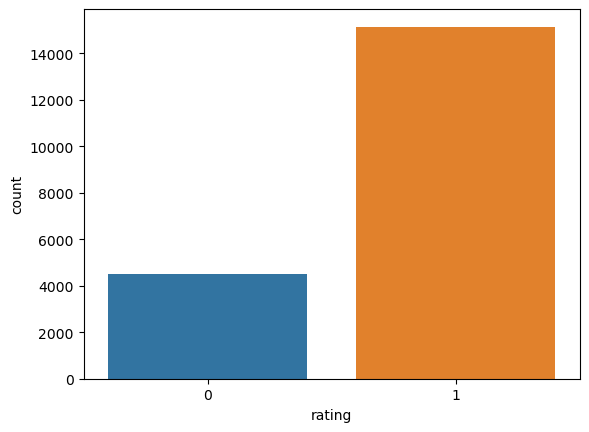

In [37]:
# check class balance
sns.countplot(x=data["rating"])

<Axes: xlabel='rating', ylabel='count'>

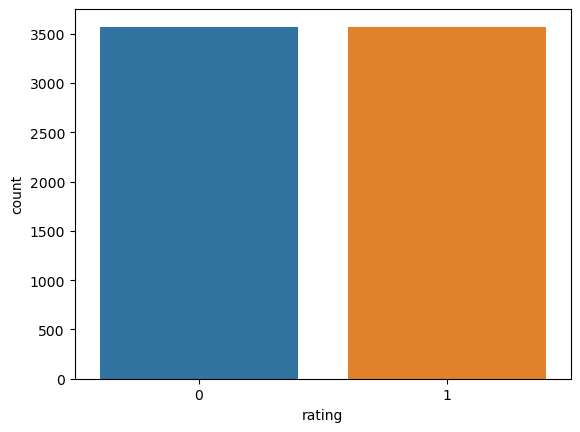

In [38]:
# undersample the positive class
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state = 10)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_undersampled)

## Sentiment Analysis
### Use Complement Naive Bayes as Base Prediction
Conduct sentiment analysis using standard Complement Naive Bayes Classifier first as a base level of accuracy. Then repeat using the Baggging Classifier with CNB to see prediction scores improve.

In [39]:
# import the complement naive bayes model
from sklearn.naive_bayes import ComplementNB

In [40]:
cnb_model = ComplementNB()
cnb_model.fit(X_train_undersampled, y_train_undersampled)

ComplementNB()

In [41]:
# evaluate model
from sklearn import metrics
y_pred = cnb_model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix, "\n\n")

classification_report = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n",)
print(classification_report)

Confusion Matrix:
[[ 930   13]
 [2962   28]] 


Classification Report:

              precision    recall  f1-score   support

           0       0.24      0.99      0.38       943
           1       0.68      0.01      0.02      2990

    accuracy                           0.24      3933
   macro avg       0.46      0.50      0.20      3933
weighted avg       0.58      0.24      0.11      3933



Text(0.5, 1.0, 'Confusion Matrix')

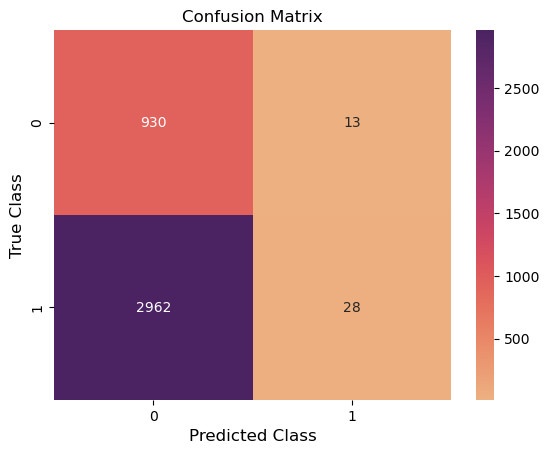

In [42]:
# visualise confusion matrix
ax = sns.heatmap(confusion_matrix, cmap="flare", annot=True, fmt="d")
ax.set_xlabel("Predicted Class", fontsize=12)
ax.set_ylabel("True Class", fontsize=12)
ax.set_title("Confusion Matrix", fontsize=12)

### Repeat Sentiment Analysis using Bagged Classifier

In [43]:
# import the BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [44]:
bagging_classifier = BaggingClassifier(estimator = ComplementNB(), n_estimators=100)

In [45]:
bagging_classifier.fit(X_train_undersampled, y_train_undersampled)

BaggingClassifier(estimator=ComplementNB(), n_estimators=100)

In [46]:
# evaluate model
y_pred_bag = bagging_classifier.predict(X_test)

confusion_matrix_bag = metrics.confusion_matrix(y_test, y_pred_bag)
print("Confusion Matrix:")
print(confusion_matrix_bag, "\n\n")

classification_report_bag = metrics.classification_report(y_test, y_pred_bag)
print("Classification Report:\n",)
print(classification_report_bag)

Confusion Matrix:
[[ 929   14]
 [2958   32]] 


Classification Report:

              precision    recall  f1-score   support

           0       0.24      0.99      0.38       943
           1       0.70      0.01      0.02      2990

    accuracy                           0.24      3933
   macro avg       0.47      0.50      0.20      3933
weighted avg       0.59      0.24      0.11      3933



Text(0.5, 1.0, 'Confusion Matrix')

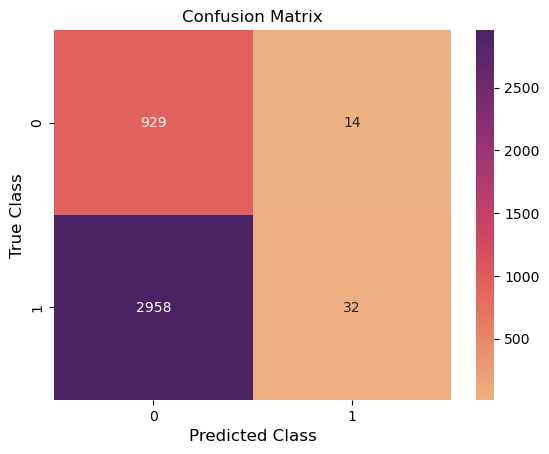

In [47]:
# visualise confusion matrix
ax = sns.heatmap(confusion_matrix_bag, cmap="flare", annot=True, fmt="d")
ax.set_xlabel("Predicted Class", fontsize=12)
ax.set_ylabel("True Class", fontsize=12)
ax.set_title("Confusion Matrix", fontsize=12)

Both the standard Complement Naive Bayes and the Bagged version are having difficulty predicting the positive class and have predicted majority as the negative class. Repeat these models using SMOTE oversampling.

### SMOTE Oversampling

In [48]:
from imblearn.over_sampling import SMOTE

<Axes: xlabel='rating', ylabel='count'>

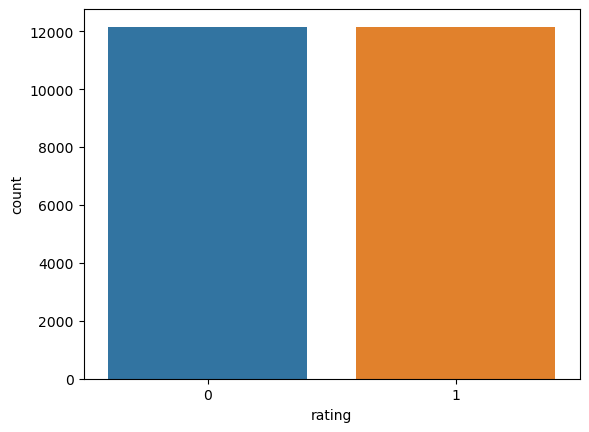

In [49]:
resampler = SMOTE(random_state=10)
X_train_smote, y_train_smote = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_smote)

In [50]:
# regular Complement Naive Bayes model
cnb_model_smote = ComplementNB()
cnb_model_smote.fit(X_train_smote, y_train_smote)

ComplementNB()

In [51]:
# evaluate model
y_pred_smote = cnb_model_smote.predict(X_test)

confusion_matrix_smote = metrics.confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix:")
print(confusion_matrix_smote, "\n\n")

classification_report_smote = metrics.classification_report(y_test, y_pred_smote)
print("Classification Report:\n",)
print(classification_report_smote)

Confusion Matrix:
[[ 927   16]
 [2947   43]] 


Classification Report:

              precision    recall  f1-score   support

           0       0.24      0.98      0.38       943
           1       0.73      0.01      0.03      2990

    accuracy                           0.25      3933
   macro avg       0.48      0.50      0.21      3933
weighted avg       0.61      0.25      0.11      3933



Text(0.5, 1.0, 'Confusion Matrix')

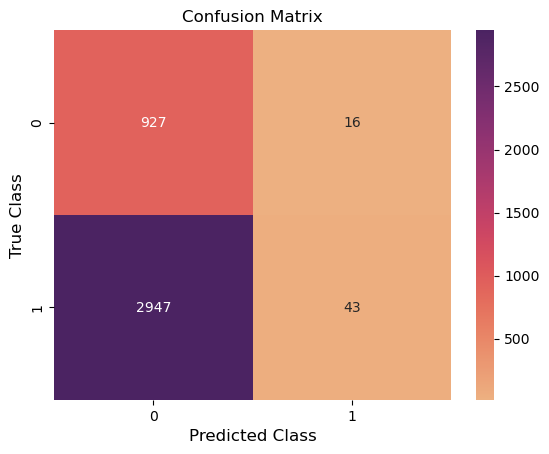

In [52]:
# visualise confusion matrix
ax = sns.heatmap(confusion_matrix_smote, cmap="flare", annot=True, fmt="d")
ax.set_xlabel("Predicted Class", fontsize=12)
ax.set_ylabel("True Class", fontsize=12)
ax.set_title("Confusion Matrix", fontsize=12)

In [53]:
bagging_classifier_smote = BaggingClassifier(estimator = ComplementNB(), n_estimators=100)

In [54]:
bagging_classifier_smote.fit(X_train_smote, y_train_smote)

BaggingClassifier(estimator=ComplementNB(), n_estimators=100)

In [55]:
# evaluate model
y_pred_bag_smote = bagging_classifier_smote.predict(X_test)

confusion_matrix_bag_smote = metrics.confusion_matrix(y_test, y_pred_bag_smote)
print("Confusion Matrix:")
print(confusion_matrix_bag_smote, "\n\n")

classification_report_bag_smote = metrics.classification_report(y_test, y_pred_bag_smote)
print("Classification Report:\n",)
print(classification_report_bag_smote)

Confusion Matrix:
[[ 929   14]
 [2954   36]] 


Classification Report:

              precision    recall  f1-score   support

           0       0.24      0.99      0.38       943
           1       0.72      0.01      0.02      2990

    accuracy                           0.25      3933
   macro avg       0.48      0.50      0.20      3933
weighted avg       0.60      0.25      0.11      3933



Text(0.5, 1.0, 'Confusion Matrix')

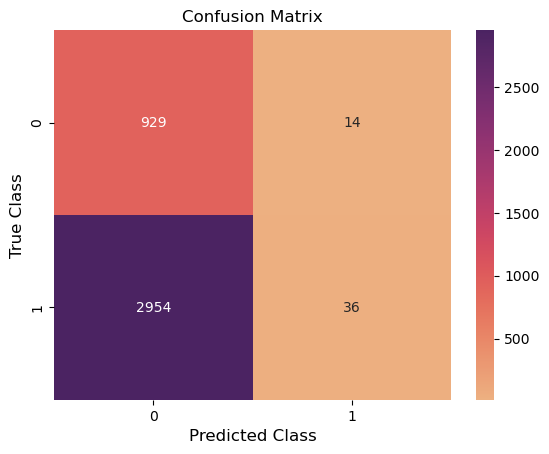

In [56]:
# visualise confusion matrix
ax = sns.heatmap(confusion_matrix_bag_smote, cmap="flare", annot=True, fmt="d")
ax.set_xlabel("Predicted Class", fontsize=12)
ax.set_ylabel("True Class", fontsize=12)
ax.set_title("Confusion Matrix", fontsize=12)

Using SMOTE has not improved the models. Now use "Bag-of-Words" method to analyse the sentiment in each review.

### Lexical/Bag-of-Words Method
Read in the dataset again to use the full review text (i.e. not tokenized), as SentimentIntensityAnalyzer from nltk vader library can use full sentences. Apply the same preprocessing steps to prepare the dataset.

In [57]:
# read in data and repeat preprocessing steps
data_vader = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)

# drop rows containing missing values in "Review Text" column
data_vader.dropna(subset=["Review Text"], inplace=True)

# delete columns not required for text mining
data_vader.drop(["Clothing ID", "Age", "Title", "Positive Feedback Count", "Division Name", "Department Name", 
                 "Class Name", "Recommended IND"], 
          axis=1, inplace=True)

# reset index of dataframe after dropping columns
data_vader.reset_index(drop=True, inplace=True)

data_vader.rename(columns={"Review Text": "review_text", "Rating":"rating"}, inplace=True)

# encode ratings of 4 & 5 as 1 and ratings of 1, 2 & 3 as 0.
data_vader["rating"].replace({1:0, 2:0, 3:0, 4:1, 5:1}, inplace=True)

### Split Data into Training and Test Sets
Split the dataset into training and test sets. There is no machine learning present in lexical method so no need to "hide" columns from each set, but this is an easy way of splitting the dataset into the 80%/20% parts for testing the method.

In [58]:
# create training & test sets
from sklearn.model_selection import train_test_split
X = data_vader
y = data_vader

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [59]:
# reset indices of training and test sets
X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)
y_train.reset_index(inplace=True)
y_test.reset_index(inplace=True)

### Calculate Polarity Scores for each Review
Use the SentimentIntensityAnalyzer from nltk's vader library to calculate a polarity score for every review.

In [60]:
# use vader SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [61]:
# test polarity score on first review
sentiment.polarity_scores(X_train.loc[0, "review_text"])

{'neg': 0.028, 'neu': 0.529, 'pos': 0.443, 'compound': 0.9872}

In [62]:
# function to apply the SentimentIntensityAnalyzer to the full dataset and add new columns for the 4 scores
def analyse_sentiment(dataset):
    dataset["compound"] = 0
    dataset["neg"] = 0
    dataset["neu"] = 0
    dataset["pos"] = 0
    for i in range(len(dataset)):
        dataset.loc[i, "compound"] = sentiment.polarity_scores(str(dataset.loc[i, "review_text"]))["compound"]
        dataset.loc[i, "neg"] = sentiment.polarity_scores(str(dataset.loc[i, "review_text"]))["neg"]
        dataset.loc[i, "neu"] = sentiment.polarity_scores(str(dataset.loc[i, "review_text"]))["neu"]
        dataset.loc[i, "pos"] = sentiment.polarity_scores(str(dataset.loc[i, "review_text"]))["pos"]
    return dataset

In [63]:
# apply analyse_sentiment function to training set
X_train = analyse_sentiment(X_train)

In [64]:
X_train.shape, X_test.shape

((18112, 7), (4529, 3))

View barplots of each polarity score aspect to see if there is any relationship between each aspect and the product "rating". 

<Axes: xlabel='rating', ylabel='compound'>

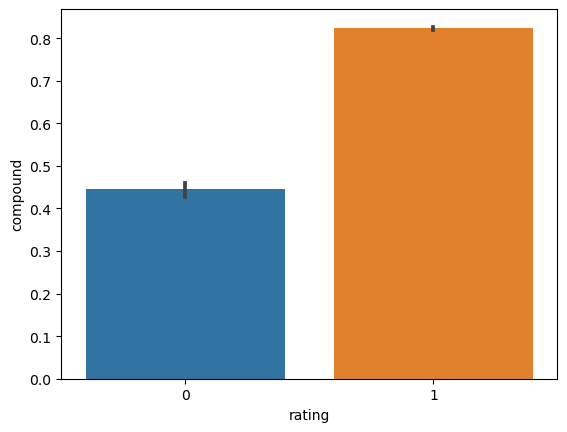

In [65]:
sns.barplot(data=X_train, x="rating", y="compound")

<Axes: xlabel='rating', ylabel='neg'>

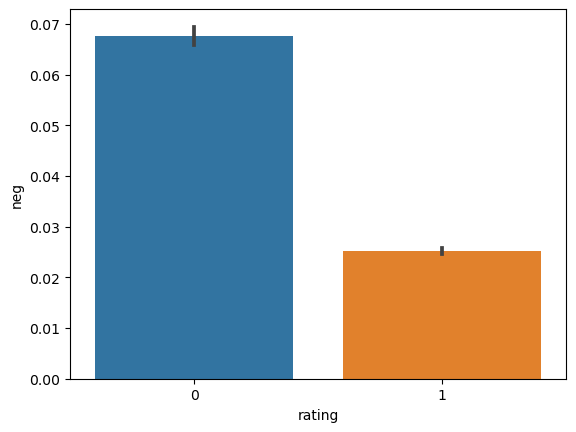

In [66]:
sns.barplot(data=X_train, x="rating", y="neg")

<Axes: xlabel='rating', ylabel='neu'>

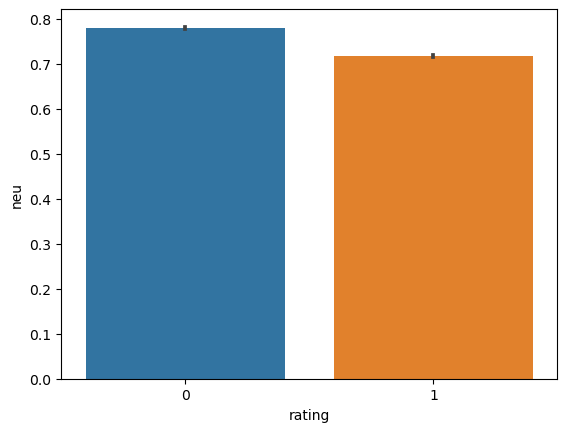

In [67]:
sns.barplot(data=X_train, x="rating", y="neu")

<Axes: xlabel='rating', ylabel='pos'>

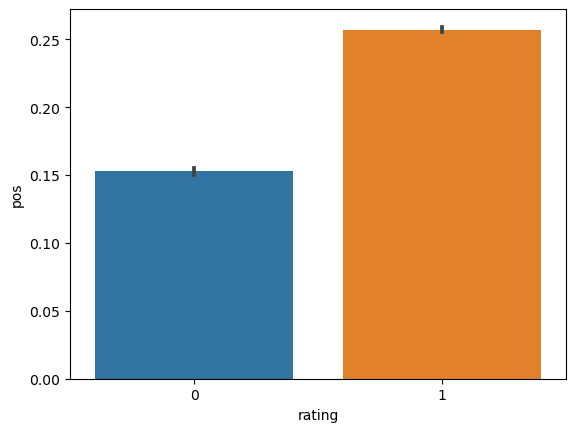

In [68]:
sns.barplot(data=X_train, x="rating", y="pos")

In [69]:
# means of each polarity score aspect for both "rating" classes
rating_groupby = X_train.groupby("rating").mean("compound")
rating_groupby

,index,compound,neg,neu,pos
rating,,,,,
0,11272.514940,0.444621,0.067654,0.779489,0.152852
1,11323.917132,0.822647,0.025253,0.717588,0.257153


<Axes: xlabel='compound', ylabel='Count'>

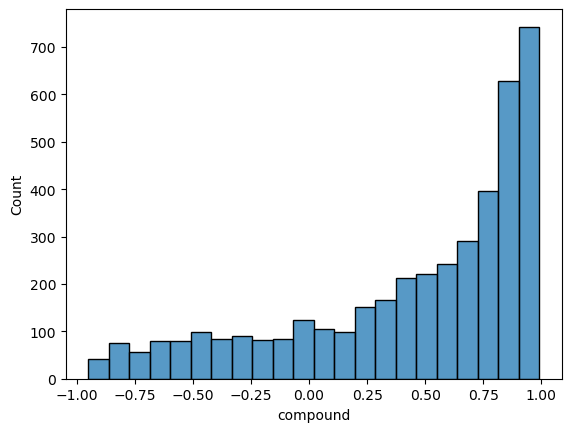

In [70]:
# view distribution of "compound" for negative ratings
sns.histplot(X_train[X_train["rating"]==0]["compound"])

<Axes: xlabel='compound', ylabel='Count'>

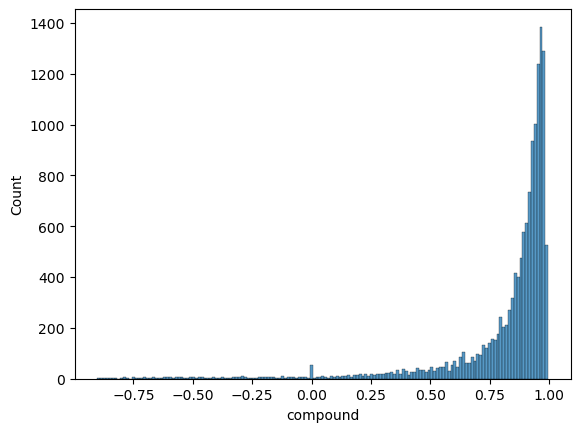

In [71]:
# view distribution of "compound" for positive ratings
sns.histplot(X_train[X_train["rating"]==1]["compound"])

Barplots and the summary table show "compound" values below ~0.45 mostly correlate to the negative rating class and "compound" values more than this should be positive reviews.
<br>
<br>
Histograms for "compound" for each "rating" class show that the there is a spread of "compound" values for both "rating" classes, but there is a more concentrated number of "compound" values between 0.75 and 1.0 for the positive "rating" class. The negative "rating" has more values below 0.00 than the positive class, which aligns with the barplots and summary table showing that the mean "compound" rating is lower for the negative class.<br>
<br>
Use 0.45 value as an initial threshold for predicting sentiment and add new column to DataFrame to store this.

In [72]:
X_train["sentiment_prediction"] = 0

In [73]:
for i in range(len(X_train)):
    if X_train.loc[i, "compound"] >= 0.45:
        X_train.loc[i, "sentiment_prediction"] = 1
    if X_train.loc[i, "compound"] < 0.45:
        X_train.loc[i, "sentiment_prediction"] = 0

In [74]:
X_train["sentiment_prediction"].value_counts()

sentiment_prediction
1    15533
0     2579
Name: count, dtype: int64

In [75]:
confusion_matrix_vader = metrics.confusion_matrix(X_train["rating"], X_train["sentiment_prediction"])
print("Confusion Matrix:")
print(confusion_matrix_vader, "\n\n")

classification_report_vader = metrics.classification_report(X_train["rating"], X_train["sentiment_prediction"])
print("Classification Report:\n",)
print(classification_report_vader)

Confusion Matrix:
[[ 1592  2558]
 [  987 12975]] 


Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.38      0.47      4150
           1       0.84      0.93      0.88     13962

    accuracy                           0.80     18112
   macro avg       0.73      0.66      0.68     18112
weighted avg       0.79      0.80      0.79     18112



The accuracy, precision and recall metrics for the rule-based model are all improvements on the Naive Bayes models. <br>
<br>
Create a function for adding the sentiment scores to the DataFrame based on the vader compound score.

In [76]:
# function for assigning sentiment prediction to DataFrame based on a vader compound score threshold
def predict_sentiment(dataframe, score_threshold):
    for i in range(len(dataframe)):
        if dataframe.loc[i, "compound"] >= score_threshold:
            dataframe.loc[i, "sentiment_prediction"] = 1
        if dataframe.loc[i, "compound"] < score_threshold:
            dataframe.loc[i, "sentiment_prediction"] = 0
    return pd.DataFrame(dataframe)

In [77]:
X_train = predict_sentiment(X_train, 0.4)
X_train["sentiment_prediction"].value_counts()

sentiment_prediction
1    15790
0     2322
Name: count, dtype: int64

Create a function to test for finding compound score thresholds with the best accuracy and F1 scores for the training dataset. Accuracy is not a sufficient measure due to the imbalanced classes.<br>
<br>
I will also check the F1 score as this is a balanced metric for correctly predicting the True Positive and True Negative classes. Precision and recall are both important for my model as identifying both the positive and negative classes is of equal importance.

In [78]:
# function to test for compound score threshold with best accuracy score and best f1 score
def find_best_compound_score_threshold(dataset, start_threshold, end_threshold):
    start_threshold = int(start_threshold*100)
    end_threshold = int(end_threshold*100)
    best_threshold_acc = 0
    best_threshold_acc_score = 0
    best_threshold_f1 = 0
    best_threshold_f1_score = 0
    for i in range(start_threshold, end_threshold):
        dataset = predict_sentiment(dataset, (i/100))
        accuracy_score = metrics.accuracy_score(dataset["rating"], dataset["sentiment_prediction"])
        f1_score = metrics.f1_score(dataset["rating"], dataset["sentiment_prediction"])
        if accuracy_score > best_threshold_acc_score:
            best_threshold_acc = i/100
            best_threshold_acc_score = accuracy_score
        if f1_score > best_threshold_f1_score:
            best_threshold_f1 = i/100
            best_threshold_f1_score = f1_score
    print("The best compound threshold for accuracy score is: " + str(best_threshold_acc) + 
          " with an accuracy score of: " + str(best_threshold_acc_score))
    print("The best compound threshold for F1 score is: " + str(best_threshold_f1) + 
          " with an F1 score of: " + str(best_threshold_f1_score))

In [79]:
# find the best threshold between 0.3 and 0.6
find_best_compound_score_threshold(X_train, 0.3, 0.6)

The best compound threshold for accuracy score is: 0.32 with an accuracy score of: 0.8053776501766784
The best compound threshold for F1 score is: 0.3 with an F1 score of: 0.8828171629418397


Function has given 0.32 as the best "compound" threshold for accuracy score on the test set and 0.3 as the best "compound" threshold for F1 score.
<br> <br>
Create a function that combines the analyse_sentiment() and predict_sentiment() functions into one for use on test sets.

In [80]:
def analyse_predict_sentiment(dataset, score_threshold):
    dataset_analysed = analyse_sentiment(dataset)
    dataset_predicted = predict_sentiment(dataset_analysed, score_threshold)
    return dataset_predicted

## Applying Method to Test Set
Apply lexical method to the test set and evaluate its performance for both thresholds.

In [81]:
# set the tet set to be only the "rating" column
y_test = y_test["rating"]

In [82]:
# apply prediction function to test set with 0.3 and 0.32 as "compound" threshold
X_test = analyse_predict_sentiment(X_test, 0.3)
X_test2 = analyse_predict_sentiment(X_test, 0.32)

In [83]:
y_pred = X_test["sentiment_prediction"].astype("int")
y_pred2 = X_test2["sentiment_prediction"].astype("int")

## Evaluate Method Performance
Use confusion matrices and classification reports to evaluate the performance of lexical method with two different "compound" thresholds.

In [84]:
# evaluate first model
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix, "\n\n")

classification_report = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n",)
print(classification_report)

Confusion Matrix:
[[ 312  731]
 [ 155 3331]] 


Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.30      0.41      1043
           1       0.82      0.96      0.88      3486

    accuracy                           0.80      4529
   macro avg       0.74      0.63      0.65      4529
weighted avg       0.79      0.80      0.77      4529



Text(0.5, 1.0, 'Confusion Matrix for First Model')

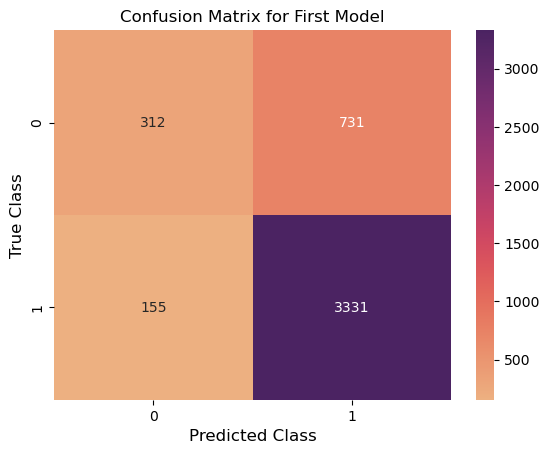

In [85]:
# visualise confusion matrix for first model
ax = sns.heatmap(confusion_matrix, cmap="flare", annot=True, fmt="d")
ax.set_xlabel("Predicted Class", fontsize=12)
ax.set_ylabel("True Class", fontsize=12)
ax.set_title("Confusion Matrix for First Model", fontsize=12)

In [86]:
# evaluate second model
confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(confusion_matrix2, "\n\n")

classification_report2 = metrics.classification_report(y_test, y_pred2)
print("Classification Report:\n",)
print(classification_report2)

Confusion Matrix:
[[ 312  731]
 [ 155 3331]] 


Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.30      0.41      1043
           1       0.82      0.96      0.88      3486

    accuracy                           0.80      4529
   macro avg       0.74      0.63      0.65      4529
weighted avg       0.79      0.80      0.77      4529



Text(0.5, 1.0, 'Confusion Matrix for Second Model')

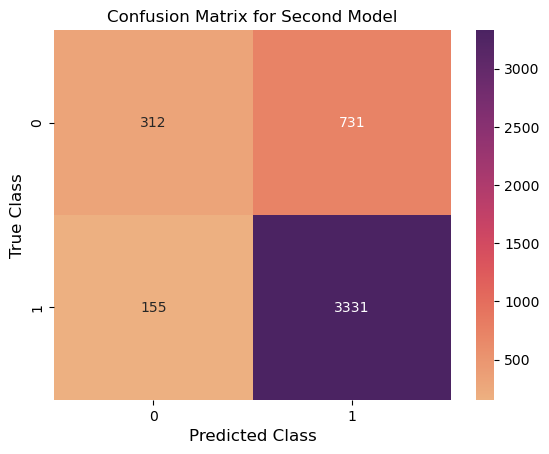

In [87]:
# visualise confusion matrix for first model
ax = sns.heatmap(confusion_matrix2, cmap="flare", annot=True, fmt="d")
ax.set_xlabel("Predicted Class", fontsize=12)
ax.set_ylabel("True Class", fontsize=12)
ax.set_title("Confusion Matrix for Second Model", fontsize=12)

The two "compound" thresholds that performed best on the training set have given identical results on the test set, with accuracy score of 0.80 and F1 score of 0.88. <br>
<br>
The function to find the best "compound" threshold could be run on the test set to find the best "compound" threshold for best results, but this risks overfitting the method to the test set. Further improvement may be found by increasing the amount of data in the training set.